# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[17, 75, 42, ..., 80, 88, 22],
       [47, 56, 18, ..., 22, 49, 54],
       [40, 66, 87, ..., 57, 28, 78],
       ...,
       [78, 97, 96, ..., 37, 43, 39],
       [52, 49, 63, ..., 84, 60,  9],
       [67, 91, 12, ..., 75, 21, 66]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [2]:
B = np.full_like(A, A)
np.random.shuffle(B.T)

In [3]:
print(B)
B.shape

[[22 56 62 ... 78 43 87]
 [54 53 30 ... 18 65 14]
 [78 61 47 ... 34 25 45]
 ...
 [39 21 42 ... 10 57 15]
 [ 9 28 83 ... 22 58 15]
 [66 94 97 ... 80 98 81]]


(200, 50)

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [4]:

arr = A[A[::, ::2].sum(axis=1) > A[::,1::2].mean()]
print(arr)
arr.shape



[[17 75 42 ... 80 88 22]
 [47 56 18 ... 22 49 54]
 [40 66 87 ... 57 28 78]
 ...
 [78 97 96 ... 37 43 39]
 [52 49 63 ... 84 60  9]
 [67 91 12 ... 75 21 66]]


(200, 50)

In [5]:
A[::, ::2].sum(axis=1) > A[::,1::2].mean()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [6]:
A.shape
B = A.max(axis=1) - A.min(axis=1)
print("index = ", B.argmax())
A[B.argmax()]

index =  11


array([68,  2, 44,  2, 60, 26, 26, 73, 92, 39, 99, 74, 23,  2,  0, 17, 45,
       82, 61, 96, 30, 92, 46, 81,  5, 68, 21, 38, 59, 19,  2, 88, 75, 56,
       48, 35, 23, 65, 28, 94, 19, 58, 13, 46, 27, 88, 27, 66, 26, 76])

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [7]:
ind = np.unravel_index(np.argsort(A,axis=None), A.shape)
A_ind = ind[0]*A.shape[1]+ind[1]
A_ind.argsort().reshape(A.shape) + 1 


array([[1810, 7684, 4350, ..., 8076, 8854, 2356],
       [4807, 5805, 1842, ..., 2258, 5003, 5536],
       [4197, 6825, 8774, ..., 5827, 2979, 7905],
       ...,
       [7938, 9743, 9611, ..., 3872, 4402, 4025],
       [5350, 5002, 6514, ..., 8474, 6203,  990],
       [6898, 9152, 1262, ..., 7676, 2163, 6765]], dtype=int64)

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [8]:
arr_min = np.tile(A.min(axis=1).reshape((A.shape[0],1)), (1,A.shape[1]))
arr_max = np.tile(A.max(axis=1).reshape((A.shape[0],1)), (1,A.shape[1]))
Norm_A = (A-arr_min)/(arr_max-arr_min)
Norm_A

array([[0.16842105, 0.77894737, 0.43157895, ..., 0.83157895, 0.91578947,
        0.22105263],
       [0.4742268 , 0.56701031, 0.17525773, ..., 0.21649485, 0.49484536,
        0.54639175],
       [0.37777778, 0.66666667, 0.9       , ..., 0.56666667, 0.24444444,
        0.8       ],
       ...,
       [0.79569892, 1.        , 0.98924731, ..., 0.35483871, 0.41935484,
        0.37634409],
       [0.49462366, 0.46236559, 0.61290323, ..., 0.83870968, 0.58064516,
        0.03225806],
       [0.68041237, 0.92783505, 0.11340206, ..., 0.7628866 , 0.20618557,
        0.67010309]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [9]:
Big_A = np.array([x * A for x in range(1, 11)])  #считается за явный вид?

print("shape: ", Big_A.shape)
Big_A

shape:  (10, 200, 50)


array([[[ 17,  75,  42, ...,  80,  88,  22],
        [ 47,  56,  18, ...,  22,  49,  54],
        [ 40,  66,  87, ...,  57,  28,  78],
        ...,
        [ 78,  97,  96, ...,  37,  43,  39],
        [ 52,  49,  63, ...,  84,  60,   9],
        [ 67,  91,  12, ...,  75,  21,  66]],

       [[ 34, 150,  84, ..., 160, 176,  44],
        [ 94, 112,  36, ...,  44,  98, 108],
        [ 80, 132, 174, ..., 114,  56, 156],
        ...,
        [156, 194, 192, ...,  74,  86,  78],
        [104,  98, 126, ..., 168, 120,  18],
        [134, 182,  24, ..., 150,  42, 132]],

       [[ 51, 225, 126, ..., 240, 264,  66],
        [141, 168,  54, ...,  66, 147, 162],
        [120, 198, 261, ..., 171,  84, 234],
        ...,
        [234, 291, 288, ..., 111, 129, 117],
        [156, 147, 189, ..., 252, 180,  27],
        [201, 273,  36, ..., 225,  63, 198]],

       ...,

       [[136, 600, 336, ..., 640, 704, 176],
        [376, 448, 144, ..., 176, 392, 432],
        [320, 528, 696, ..., 456, 224, 624

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [10]:

A_odd = A[::,1::2]
A_even = A[::,0::2]

New_A = np.concatenate((A_even, A_odd), axis=1)
New_A

array([[17, 42, 32, ..., 51, 80, 22],
       [47, 18, 26, ..., 69, 22, 54],
       [40, 87, 12, ..., 26, 57, 78],
       ...,
       [78, 96, 70, ..., 55, 37, 39],
       [52, 63, 63, ..., 98, 84,  9],
       [67, 12, 50, ..., 52, 75, 66]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [11]:
A_5 = A-5
A_5[A_5 < 0] = 0
np.count_nonzero(np.all(A, axis=1))

134

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который состоит из средних этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [12]:
arr_of_means = np.mean(np.split(A, 10, axis=0), axis=0)
arr_of_means.shape

(20, 50)

In [13]:
arr_of_means

array([[57.5, 55.7, 53.2, 65.6, 56.5, 67.8, 30.5, 49.3, 47.3, 38.7, 43.3,
        53.4, 53.7, 49.6, 41.5, 34.8, 55.2, 48.5, 60.1, 44.5, 59.7, 57.7,
        31.4, 49.2, 53.2, 58.1, 34.9, 40.3, 40.3, 46.7, 45.4, 43. , 47.1,
        41.8, 54. , 44.6, 32.9, 36.9, 44.5, 64.4, 39.3, 44.3, 58.6, 53. ,
        43.9, 46.8, 64.5, 55.3, 48.4, 55.1],
       [52.5, 56.3, 52.7, 56.4, 50.4, 49.7, 45.1, 38.7, 62.5, 51. , 46.7,
        62. , 42.3, 32.6, 39.6, 64.9, 42.7, 48.9, 44.1, 47.9, 63.6, 67.8,
        54.9, 35.5, 56.8, 46.1, 60.6, 57.6, 56.2, 51.9, 53.3, 45.7, 59.9,
        53.2, 47.9, 64.9, 32. , 41.2, 52.1, 44.7, 43.3, 51. , 42. , 37.2,
        71.2, 43.8, 27.5, 49.4, 48.1, 41.2],
       [46.9, 47.9, 40.2, 50.6, 59.6, 36.1, 48.7, 43.9, 61.4, 45. , 39.3,
        47.7, 60.6, 44.8, 51.5, 37.1, 60.4, 57.7, 44.6, 52.7, 50.2, 43. ,
        45.5, 49.7, 34.8, 42.2, 59.3, 62.1, 49.8, 53.3, 47.3, 53.4, 43. ,
        44.1, 51.1, 46.1, 39.8, 38.3, 56.3, 48.3, 59. , 64.1, 44.9, 38.7,
        38.1, 29.8, 43

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [14]:
_, inds = np.unique(A, return_index = True)
B = A
B = B.reshape((200*50))
B[inds]
inds = np.sort(inds)
B[inds]

array([17, 75, 42, 43, 32, 91, 29, 21, 95, 13, 25, 59, 22, 44, 87, 28, 78,
       60, 65, 94, 37, 92, 69, 93, 23,  1,  2,  3, 88, 12, 33,  9, 96, 62,
       84, 56, 26, 51,  6, 80, 47, 18, 61, 45,  7, 30, 50, 64, 57, 49, 98,
       41,  5, 36, 68,  8, 11, 86, 71, 14, 83, 53, 40, 54, 66, 73, 63, 90,
       34, 31, 38, 81, 15, 39, 19, 24, 77, 55,  4, 89, 85, 35, 16, 46,  0,
       58, 97, 52, 27, 70, 20, 74, 82, 76, 72, 48, 79, 10, 99, 67])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [15]:
mean_arr = (A[:]-A[99])**2
mean_arr = np.sqrt(mean_arr.sum(axis=1))
mean_arr

array([305.87415713, 279.00179211, 302.17379105, 296.16887075,
       291.24903433, 293.67839553, 259.27398635, 327.66751441,
       322.28403622, 300.49625622, 244.42790348, 309.03074281,
       262.74131765, 306.38864209, 263.56593103, 325.48732694,
       270.70648311, 304.12826242, 320.92210893, 275.41241802,
       293.30700639, 256.14644249, 342.49671531, 267.07302372,
       245.10201958, 286.01573383, 295.37095321, 271.61001454,
       262.45952069, 283.30372394, 254.87644065, 318.84949428,
       291.17692216, 309.12295288, 284.19359599, 285.32262441,
       327.11007322, 328.21791542, 266.25551637, 330.08029326,
       252.54504549, 296.12497362, 269.31579976, 301.57751906,
       327.52404492, 300.27487407, 301.12787981, 322.1738661 ,
       305.18191296, 310.67668081, 263.36666456, 264.27447853,
       319.03918255, 272.92306608, 274.38476634, 284.30793165,
       308.62436715, 279.8267321 , 284.94736356, 287.0296152 ,
       238.51834311, 280.49420671, 238.83885781, 264.17

In [16]:
mean_arr.shape

(200,)

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [17]:
print(A)
np.where(A<50, 2*A, 3*A)

[[17 75 42 ... 80 88 22]
 [47 56 18 ... 22 49 54]
 [40 66 87 ... 57 28 78]
 ...
 [78 97 96 ... 37 43 39]
 [52 49 63 ... 84 60  9]
 [67 91 12 ... 75 21 66]]


array([[ 34, 225,  84, ..., 240, 264,  44],
       [ 94, 168,  36, ...,  44,  98, 162],
       [ 80, 198, 261, ..., 171,  56, 234],
       ...,
       [234, 291, 288, ...,  74,  86,  78],
       [156,  98, 189, ..., 252, 180,  18],
       [201, 273,  24, ..., 225,  42, 198]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте новый массив той же размерности, состоящий из суммы скользящих средних по окну $3$, $5$, $10$.

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [18]:
def rolling_mean(x, w):
    return [np.convolve(x, np.ones(i), mode='valid')/i for i in w]

def rolling_mean_(x, w):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return [(cumsum[i:] - cumsum[:-i]) / float(i) for i in w]


A_1D = A.flatten()
w = [3, 5, 10]

W = rolling_mean(A_1D, w)
print(W[0].shape, W[1].shape, W[2].shape)
T = rolling_mean_(A_1D, w)
w1, w2, w3 = W[0].resize((200,50)), W[1].resize((200,50)), W[2].resize((200,50)) #Недостающие элементы обиваются нулями


Sum_W = np.array(W).sum(axis=0)
Sum_W

(9998,) (9996,) (9991,)


array([[132.26666667, 156.53333333, 131.4       , ..., 176.93333333,
        145.63333333, 126.66666667],
       [128.43333333, 133.23333333, 126.83333333, ..., 137.26666667,
        157.06666667, 156.33333333],
       [160.03333333, 162.23333333, 148.33333333, ..., 123.03333333,
        103.76666667,  95.8       ],
       ...,
       [231.93333333, 216.83333333, 186.63333333, ..., 139.86666667,
        151.36666667, 157.26666667],
       [166.86666667, 171.96666667, 185.03333333, ..., 171.2       ,
        142.83333333, 161.36666667],
       [171.76666667, 169.2       , 152.93333333, ...,  54.        ,
          0.        ,   0.        ]])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

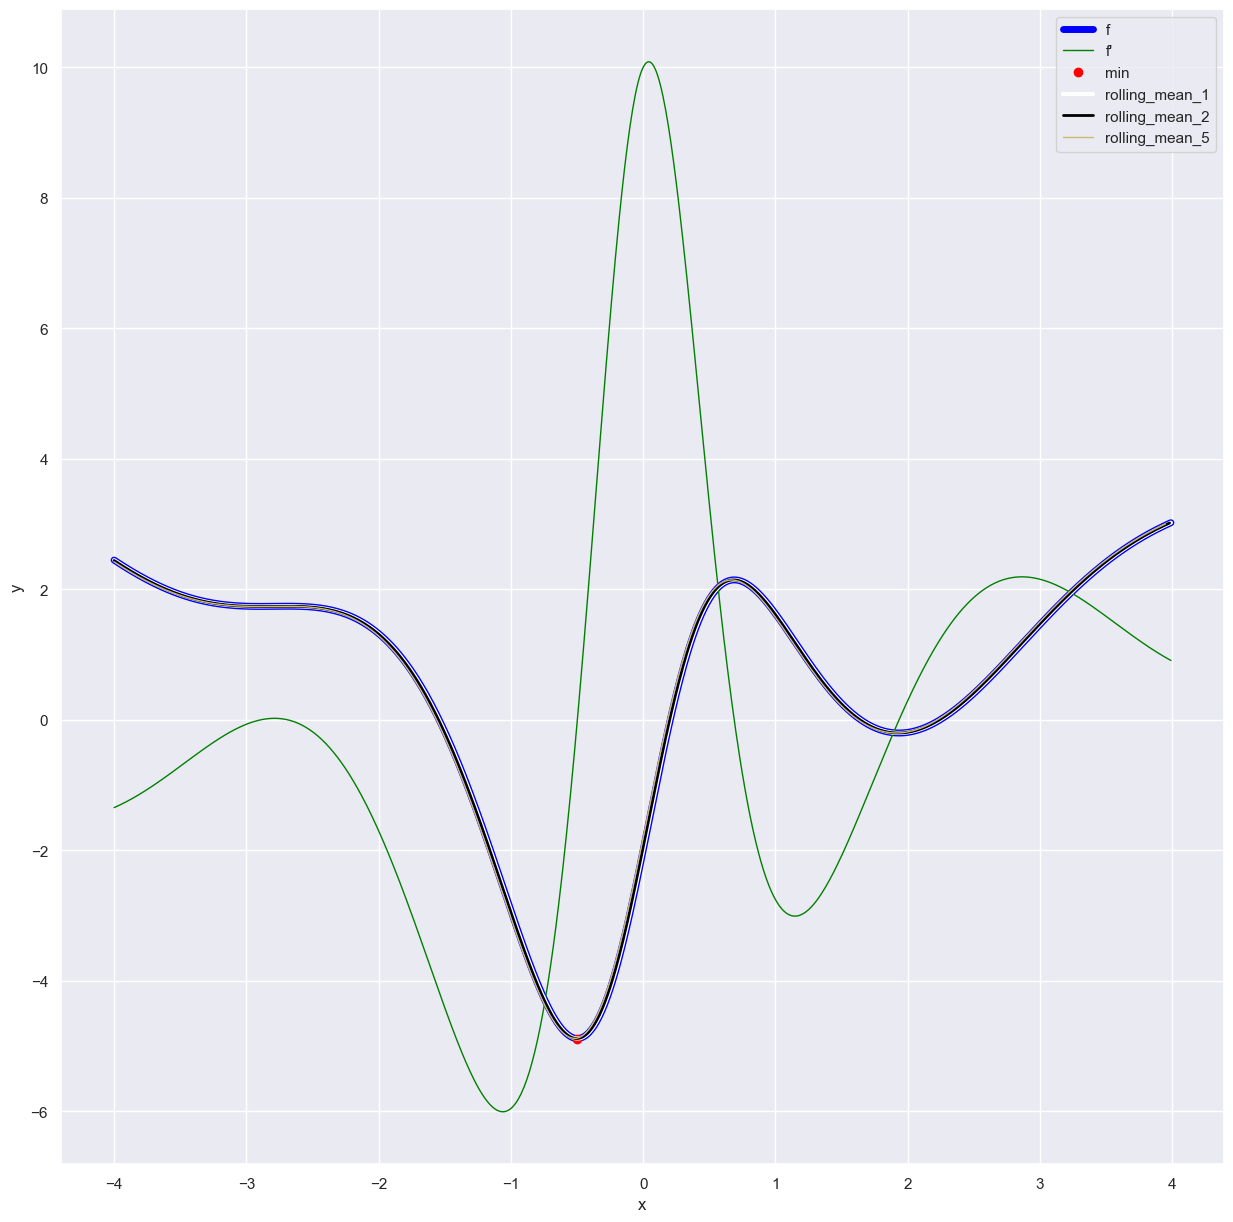

In [19]:
def func(x):
    return (5*np.sin(2*x)-np.cos(x)*np.cos(x)-1+np.abs(x*x*x)-x*x)/(x*x+1)

x = np.arange(-4,4,0.01)
y = func(x)
plt.figure(figsize=(15, 15))
plt.plot(x, y, linewidth=5, color='blue')

ix = np.arange(-4,4,0.01)
iy = sp.misc.derivative(func, ix, dx=1e-6)
func_min = sp.optimize.minimize(func, x0=0, method='nelder-mead')
plt.plot(ix, iy, linewidth=1, color='green')
plt.plot(func_min.x, func(func_min.x),'o', color='red')
plt.xlabel('x')
plt.ylabel('y')


w = [1,2,5]
r_m = rolling_mean(y, w)

plt.plot(x[:r_m[0].shape[0]], r_m[0], color='w', linewidth=3)
plt.plot(x[:r_m[1].shape[0]], r_m[1], color='black', linewidth=2)
plt.plot(x[:r_m[2].shape[0]], r_m[2], color='y', linewidth=1)
plt.legend(('f', "f'", 'min', 'rolling_mean_1', 'rolling_mean_2', 'rolling_mean_5'))



# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [20]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return x[res]

ex =np.array([50, 3, 1, 7, 20])       


Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [21]:
def sampling_np(x, n):
    return np.random.choice(x, n, replace=True)

In [22]:
test = []

for i in range(100):
    res1 = sampling_np(ex,5)
    res2 = sample(ex,5)
    test.append(sp.stats.ttest_ind(res1, res2).pvalue)

C:\Users\admin\AppData\Local\Temp\ipykernel_42824\130902504.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  test.append(sp.stats.ttest_ind(res1, res2).pvalue)


In [23]:
pos = np.array(test) >= 0.05 #выборки однородные, нулевая гипотеза о равенстве матожиданий совпадает
len(np.where(pos==True)[0])

60

In [24]:
neg = np.array(test) < 0.05 #Выборки неоднородные, нулевая гипотеза отвергается
len(np.where(neg==True)[0])

40

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [25]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

1799

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном запусков. 

In [26]:
import timeit

In [27]:
def walk_np(n: int):
    steps = np.random.choice([-3, -1, 0, 2, 3], size=n)
    return np.sum(steps)


walk_np(10_000)

2097

In [28]:
print("Function walk: ", timeit.timeit('walk(10000)', globals=globals(), number=100)) #для 100 повторений
print("Function walk_np: ", timeit.timeit('walk_np(10000)', globals=globals(), number=100))

Function walk:  2.568682297001942
Function walk_np:  0.06008493599074427


<AxesSubplot: ylabel='Density'>

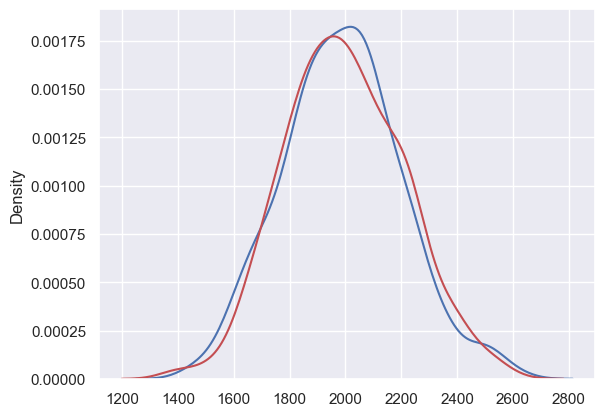

In [29]:
data_1 = [walk_np(10000) for i in range(500)]
data_2 = [walk(10000) for i in range(500)]
sns.kdeplot(data_1, color='b') #функция с numpy 
sns.kdeplot(data_2, color='r') #изначальная функция


# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [36]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

a = np.random.random((1000, 1000))

In [37]:
import cython

%load_ext cython
from numba import njit

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [38]:
@njit
def strange_conv_numba(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


In [39]:
%%cython

cimport numpy 


def strange_conv_cython(numpy.ndarray['double', ndim=2] a):
    cdef int x = a.shape[0]
    cdef int y = a.shape[1]

    cdef double t = 1.
    cdef double c = 0.

    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c
    
    return t


Сравним время для 3-х функций:

In [40]:
%%timeit
strange_conv(a)

439 ms ± 17.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%%timeit
strange_conv_numba(a)

1.15 ms ± 329 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
%%timeit
strange_conv_cython(a)

5.3 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Уеньшила размер матрицы из-за временных затрат (функция без оптимизации считалась долго)
1) при оптимизации Numba ускорение в 382 раза
2) при оптимизации cython ускорение в 83 раза

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.